## League Of Legends Diamond Ranking Games Outcome Prediction

- **Main objective**: predict the outcome of the game (whether blue wins) based on the details within the first 10 minutes of the game

## EDA (Exploratory Data Analysis)

In [17]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline


In [10]:
# read in the data
game_stat = pd.read_csv('high_diamond_ranked_10min.csv')
game_stat.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [11]:
# information about the data
game_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [15]:
# check for null values
game_stat.isnull().sum()
# the data contains no null values

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [16]:
# produce the correlation matrix (columns that are related to blueWins)
rs = np.random.RandomState(0)
corr = game_stat.corr()
corr = pd.DataFrame(corr['blueWins'])
corr.style.background_gradient(cmap='coolwarm')

,blueWins
gameId,0.000985
blueWins,1.000000
blueWardsPlaced,0.000087
blueWardsDestroyed,0.044247
blueFirstBlood,0.201769
blueKills,0.337358
blueDeaths,-0.339297
blueAssists,0.276685
blueEliteMonsters,0.221944
blueDragons,0.213768


In [25]:
#check for the data that blue wins + blue lose
print('Number of records where blue lost:',len(game_stat[game_stat['blueWins'] == 0]))
print('Number of records where blue won:',len(game_stat[game_stat['blueWins'] == 1]))
# the records are pretty balanced

Number of records where blue lost: 4949
Number of records where blue won: 4930


## MODELING


In [51]:
# split the dataset
y= game_stat['blueWins'] #dependent variable is Decision
x= game_stat.drop(['blueWins','gameId'], axis=1)
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)


In [52]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-1.86780898e-06]
The coefficient b1=  [[-1.69781245e-03  1.33048070e-04  5.79423059e-04  2.28750987e-04
  -9.28940885e-04  8.99664632e-04  3.01965167e-03  3.04471976e-03
  -2.50680952e-05 -1.78498996e-04  9.04926413e-05 -6.68848216e-05
   3.09688881e-05 -2.10502229e-03  1.03514826e-02  1.74455829e-04
   9.12021934e-05 -2.10502229e-04  9.04926412e-06 -2.03565577e-03
  -6.97458345e-04 -5.81290858e-04 -9.28940885e-04  2.28750987e-04
   3.23781159e-04 -3.17582512e-03 -2.97381601e-03 -2.02009115e-04
   2.65458283e-04 -8.39631873e-05 -7.83296908e-05 -6.02333052e-05
   2.48412848e-03 -2.28394283e-03 -1.74455829e-04 -9.12021934e-05
   2.48412848e-04 -8.39631873e-06]]


In [53]:
from sklearn.metrics import accuracy_score
y_pred= modelLogistic.predict(x_test)
score =accuracy_score(y_test,y_pred)

In [54]:
print(score)

0.7332995951417004


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [60]:
clf = RandomForestClassifier()
model = clf.fit(x_train, y_train)

In [61]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_test)
score =accuracy_score(y_test,y_pred)

In [62]:
print(score)

0.7160931174089069


<Axes: >

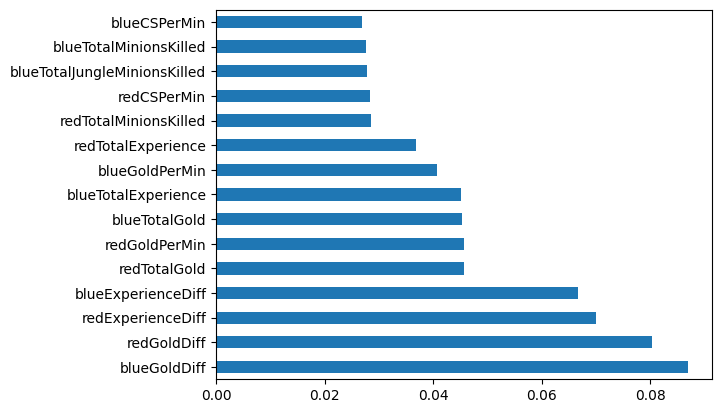

In [63]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

## XGBoost

In [55]:
 import xgboost as xgb

In [56]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
from sklearn.metrics import accuracy_score
y_pred= model_xgb.predict(x_test)
score =accuracy_score(y_test,y_pred)
print(score)

0.6912955465587044


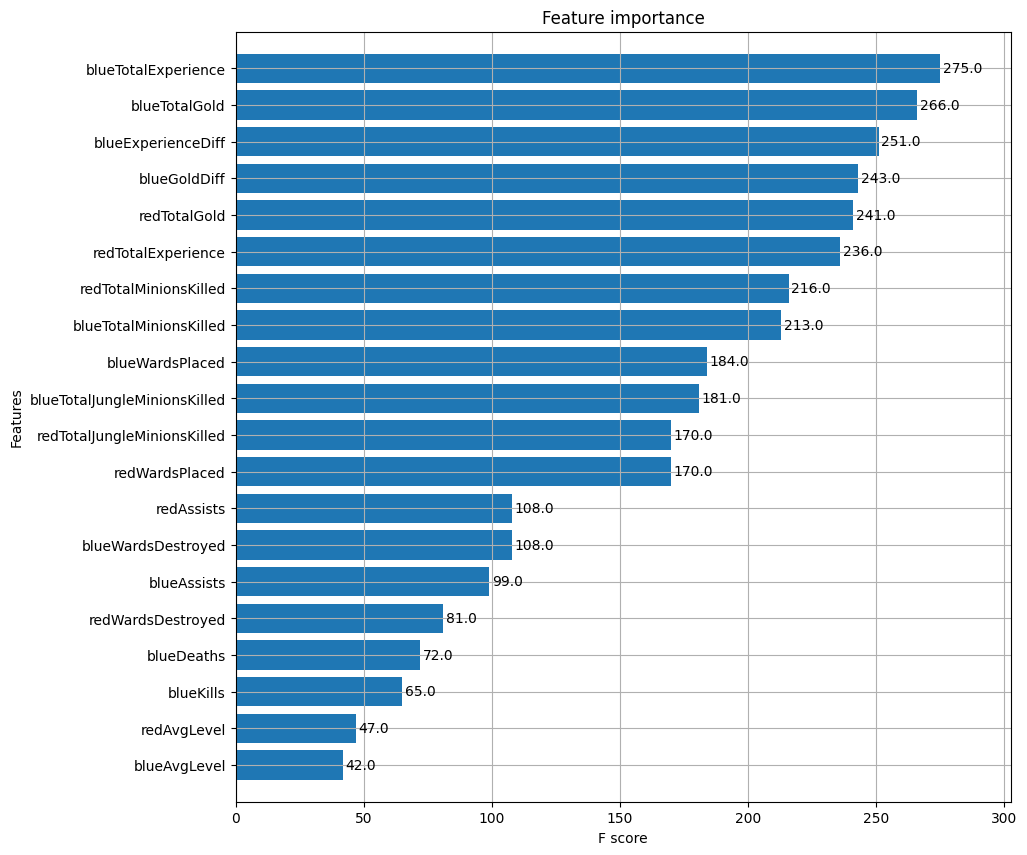

In [58]:
# Let's see the feature importance for XBG model
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model_xgb, max_num_features=20, height=0.8, ax=ax)
plt.show()